In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut

from sklearn.cluster import KMeans

## Template Data Science -- Hands On Machine Learning

### Dados

leitura de dados e escolha das colunas pra X e y

In [2]:
dataset = pd.read_csv('data\Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
def data_info(data):        
    info = pd.DataFrame()
    info['var'] = data.columns
    info['# missing'] = list(data.isnull().sum())
    info['% missing'] = info['# missing'] / data.shape[0]
    info['types'] = list(data.dtypes)
    info['unique values'] = list(len(data[var].unique()) for var in data.columns)
    
    return info

In [5]:
data_info(dataset)

,var,# missing,% missing,types,unique values
0,User ID,0,0.0,int64,400
1,Gender,0,0.0,object,2
2,Age,0,0.0,int64,43
3,EstimatedSalary,0,0.0,int64,117
4,Purchased,0,0.0,int64,2


### Preprocessing

In [6]:
X = pd.DataFrame(dataset.iloc[:, 1:4])
y = pd.DataFrame(dataset.iloc[:, 4])

#### Lidando com variáveis categóricas

Label Encoder: dá a cada elemento da variável categórica um número

    Uso: categóricas ordinais

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_le = X.copy()
for var in X.columns:
    if (X[var].dtype == object):
        X_le[var] = le.fit_transform(X[var])

In [8]:
X_le.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


One Hot Encoder

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
X_le = X.copy()
X_ohe = X.copy()
for var in X.columns:
    if (X[var].dtype == object):
        ohe = OneHotEncoder(categorical_features = [0])
        X_le[var] = le.fit_transform(X[var])
        X_ohe = ohe.fit_transform(X_le)

In [10]:
X_ohe

<400x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1200 stored elements in COOrdinate format>

#### Padronização e Normalização 

In [11]:
X_encoded = X_le

In [12]:
X_encoded.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


Normalização StandardScaler: remove a média de cada atributo e divide os atributos não-constantes pelo desvio padrão. Ex de uso: se um atributo cuja variância é MUITO maior do que do que dos outros atributos, este atributo pode dominar a função objetivo e impossibilitar o estimador de aprender com as outras features

In [13]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_encoded)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X_stds = pd.DataFrame(std_scaler.transform(X_encoded), columns = X_encoded.columns)

In [15]:
X_stds.head()

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


Normalização para intervalo: escalar os atributos para que seus valores fiquem dentro de um intervalo, dado o valor mínimo e o máximo

In [16]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_encoded)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_minmaxs = pd.DataFrame(minmaxscaler.transform(X_encoded), columns = X_encoded.columns)

In [18]:
X_minmaxs.head()

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852


Normalização Robust Scaler: Quando o dataset contém muitos outliers, usar média e variância não trará resultados bons. Usa uma estimativa mais robusta para encontrar o centro dos dados. Remove a mediana e escala os dados de acordo com os intervalos de quartis(intervalo interquartil (IQR): intervalo entre o primeiro quartil (25%) e o terceiro quartil (75%))

In [19]:
from sklearn.preprocessing import RobustScaler

robscaler = RobustScaler()
robscaler.fit(X_encoded)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [20]:
X_robusts = pd.DataFrame(robscaler.transform(X_encoded), columns = X_encoded.columns)

In [21]:
X_robusts.head()

,Gender,Age,EstimatedSalary
0,1.0,-1.107692,-1.133333
1,1.0,-0.123077,-1.111111
2,0.0,-0.676923,-0.600000
3,0.0,-0.615385,-0.288889
4,1.0,-1.107692,0.133333


Normalização por sample (linha): cada registro/sample com pelo menos um componente não zero é reescalado independentemente dos outros samples

-- l1-norm: divide cada elemento de cada sample pela soma dos módulos de cada elemento do tal sample

-- l2-norm: divide cada elemento de cada sample pela raíz quadrada da soma dos quadrados de cada elemento de tal sample

In [22]:
from sklearn.preprocessing import Normalizer

nscaler = Normalizer(norm = 'l1')
nscaler.fit(X_encoded)

Normalizer(copy=True, norm='l1')

In [23]:
X_norm = pd.DataFrame(nscaler.transform(X_encoded), columns = X_encoded.columns)

In [24]:
X_norm.head()

,Gender,Age,EstimatedSalary
0,0.000053,0.000999,0.998948
1,0.000050,0.001747,0.998203
2,0.000000,0.000604,0.999396
3,0.000000,0.000473,0.999527
4,0.000013,0.000250,0.999737


#### Train Test Split

In [25]:
#escolha do X
X_preped = X_stds

Hold out - Seleção de uma base de treino e outra de teste a partir de um mesmo dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_preped, y, test_size = 0.3, random_state = 0)

K-folds para inserir nos métodos

In [27]:
from sklearn.model_selection import StratifiedKFold, KFold, LeaveOneOut

cv_kfold = KFold(5, random_state=12)
cv_leave_one_out = LeaveOneOut()

### Modelagem -- Classificação

In [28]:
from scipy import stats
from sklearn.metrics import f1_score, roc_auc_score, auc, roc_curve, precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate


In [29]:
def results_holdout(clf, X_train, y_train, X_test, y_test):
    
    classifier = clf.fit(X_train, np.ravel(y_train))
    metrics = [f1_score, precision_score, recall_score, accuracy_score]
    
    pred_train = classifier.predict(X_train)
    pred_test = classifier.predict(X_test)

    prob_train = classifier.predict_proba(X_train)
    prob_test = classifier.predict_proba(X_test)
    
    results = pd.DataFrame()
    
    for m in metrics:
        result_train = m(y_train, pred_train)
        result_test = m(y_test, pred_test)
        
        dict_res = {'Treino': [result_train], 'Teste': [result_test]}
        res_aux = pd.DataFrame(dict_res, index = [str(m.__name__)])
        
        results = pd.concat([results, res_aux], axis = 0)
    
    
    train_res = pd.concat([y_train, pd.DataFrame(prob_train).iloc[:,1]], axis = 1)
    test_res = pd.concat([y_test, pd.DataFrame(prob_test).iloc[:,1]], axis = 1)
    train_res.columns = ['y_train', 'prob']
    test_res.columns = ['y_test', 'prob']
    
    train_prob_True1 = train_res[train_res.y_train == 1]
    train_prob_True0 = train_res[train_res.y_train == 0]
    
    test_prob_True1 = test_res[test_res.y_test == 1]
    test_prob_True0 = test_res[test_res.y_test == 0]
    
    dict_res_ks = {'Treino': [stats.ks_2samp(train_prob_True1.prob, train_prob_True0.prob).statistic], 
                   'Teste': [stats.ks_2samp(test_prob_True1.prob, test_prob_True0.prob).statistic]}
    
    res_aux_ks = pd.DataFrame(dict_res_ks, index = ['KS'])
    results = pd.concat([results, res_aux_ks], axis = 0)
    
    return results

def results_cv(clf, X_train, y_train, kcv):
    
    classifier = clf.fit(X_train, np.ravel(y_train))
    metrics = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc']
    
    results = pd.DataFrame()
    for m in metrics:
        cv_results = cross_validate(clf, X_train, np.ravel(y_train), scoring = m, cv = kcv, return_train_score = True)
        dict_res = {'' + m + '_Treino': cv_results['train_score'], 
                    '' + m + '_Teste': cv_results['test_score']}
        res_aux = pd.DataFrame(dict_res)
        results = pd.concat([results, res_aux], axis = 1)
        
    results_mean = np.transpose(pd.DataFrame(results.mean(), columns=['media']))
    results = pd.concat([results, results_mean], axis = 0)
    return results


def grid_search(clf, X_train, y_train, params, score, cv):    
    grid = GridSearchCV(clf, params, scoring = score, cv = cv, return_train_score=True)
    grid_fitted = grid.fit(X_train, np.ravel(y_train))
    print ("Best score: %.4f" % grid_fitted.best_score_)
    print ("Best parameters: %s" % grid_fitted.best_params_)
    return grid_fitted, grid_fitted.best_estimator_, grid_fitted.cv_results_

#### Métricas usadas

#### ----------------- A completar

#### KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

#quando p = 2, a distancia de minkowski é equivalente à euclidiana
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'brute', leaf_size = 30, p = 2, 
                           metric = 'minkowski', metric_params = None, n_jobs = 1)

knn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

predict

In [32]:
X_pred = std_scaler.transform([[1, 30, 40000]])

In [90]:
knn.predict(X_pred)[0]

0

grid search

In [34]:
params = {
    'weights' : ['uniform'],
    'n_neighbors': [5] ,
    'algorithm': ['brute']
}
clf = KNeighborsClassifier()
grid, model, results = grid_search(clf, X_train, y_train, params, 'accuracy', cv_kfold)
model

Best score: 0.8964
Best parameters: {'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'uniform'}


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
#retorna dentre outras coisas, para treino e teste qual o score de cada grid usado (12 opções dados os parametros -- combinações)
#em cada split
results

{'mean_fit_time': array([0.00189905]),
 'std_fit_time': array([0.00111076]),
 'mean_score_time': array([0.00140142]),
 'std_score_time': array([0.00111468]),
 'param_algorithm': masked_array(data=['brute'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[5],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'uniform'}],
 'split0_test_score': array([0.85714286]),
 'split1_test_score': array([0.89285714]),
 'split2_test_score': array([0.85714286]),
 'split3_test_score': array([0.92857143]),
 'split4_test_score': array([0.94642857]),
 'mean_test_score': array([0.89642857]),
 'std_test_score': array([0.03642157]),
 'rank_test_score': array([1]),
 'split0_train_score': array([0.91517857]),
 'split1_t

Melhor modelo encontrado pelo grid

In [36]:
best_params = {'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'uniform'}

In [37]:
best_knn = KNeighborsClassifier()
best_knn.set_params(**(best_params))

best_knn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

holdout results todas as metricas

In [38]:
results_holdout(knn, X_train, y_train, X_test, y_test)

,Treino,Teste
f1_score,0.890995,0.880952
precision_score,0.862385,0.860465
recall_score,0.921569,0.902439
accuracy_score,0.917857,0.916667
KS,0.331461,0.295770


Nota: calculo do cross val score em treino e teste sem fazer o grid

possíveis métricas: ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']

In [39]:
cv_results = cross_validate(knn, X_train, np.ravel(y_train), scoring = 'f1', cv = cv_kfold, return_train_score = True)

In [40]:
cv_results['train_score']

array([0.88050314, 0.86792453, 0.90361446, 0.89142857, 0.87640449])

CV results todas as métricas

In [41]:
results_cv(knn, X_train, y_train, cv_kfold)

,f1_Treino,f1_Teste,precision_Treino,precision_Teste,recall_Treino,recall_Teste,accuracy_Treino,accuracy_Teste,roc_auc_Treino,roc_auc_Teste
0,0.880503,0.826087,0.853659,0.904762,0.909091,0.760000,0.915179,0.857143,0.974512,0.916774
1,0.867925,0.875000,0.851852,0.875000,0.884615,0.875000,0.906250,0.892857,0.971988,0.936849
2,0.903614,0.800000,0.903614,0.761905,0.903614,0.842105,0.928571,0.857143,0.980689,0.896871
3,0.891429,0.894737,0.866667,0.809524,0.917647,1.000000,0.915179,0.928571,0.969319,0.966817
4,0.876404,0.914286,0.838710,0.888889,0.917647,0.941176,0.901786,0.946429,0.966441,0.990196
media,0.883975,0.862022,0.862900,0.848016,0.906523,0.883656,0.913393,0.896429,0.972590,0.941501


#### Naïve Bayes -- Gaussian, Bernoulli, Multinomial

Gaussian: Variáveis contínuas. Assume-se que a probabilidade dos atributos é Gaussiana.

Bernoulli: Variáveis binárias. Podem ter vários atributos, mas cada um deles deve ser binário. Se for passado qualquer outro tipo de variável, essa será binarizada (dependendo do parâmetro binarize -- treshold)

Multinomial: Variáveis discretas. Usa contagem de frequência relativa.

In [42]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

nb = GaussianNB()
#nb = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
#nb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

nb.fit(X_train, np.ravel(y_train))

GaussianNB(priors=None)

In [93]:
nb.predict(std_scaler.transform([[1, 30, 40000]]))[0]

0

Holdout

In [43]:
results_holdout(nb, X_train, y_train, X_test, y_test)

,Treino,Teste
f1_score,0.844221,0.857143
precision_score,0.865979,0.916667
recall_score,0.823529,0.804878
accuracy_score,0.889286,0.908333
KS,0.331461,0.320161


CV

In [44]:
results_cv(nb, X_train, y_train, cv_kfold)

,f1_Treino,f1_Teste,precision_Treino,precision_Teste,recall_Treino,recall_Teste,accuracy_Treino,accuracy_Teste,roc_auc_Treino,roc_auc_Teste
0,0.847682,0.772727,0.864865,0.894737,0.831169,0.680000,0.897321,0.821429,0.942751,0.939355
1,0.857143,0.800000,0.868421,0.857143,0.846154,0.750000,0.901786,0.839286,0.954074,0.915365
2,0.875000,0.780488,0.909091,0.727273,0.843373,0.842105,0.910714,0.839286,0.957020,0.891892
3,0.824242,0.944444,0.850000,0.894737,0.800000,1.000000,0.870536,0.964286,0.940161,0.974359
4,0.826347,0.969697,0.841463,1.000000,0.811765,0.941176,0.870536,0.982143,0.931528,0.998492
media,0.846083,0.853471,0.866768,0.874778,0.826492,0.842656,0.890179,0.889286,0.945107,0.943892


#### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = None, min_samples_split = 2, 
                              min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = None, random_state = None, 
                              max_leaf_nodes = None, min_impurity_decrease = 0.0, min_impurity_split = None, 
                              class_weight = None, presort = False)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [92]:
tree.predict(std_scaler.transform([[1, 30, 40000]]))[0]

0

Grid Search

In [46]:
clf = DecisionTreeClassifier()
params = {
    'criterion' : ['entropy', 'gini'],
    'min_samples_split': [0.01, 0.03] ,
    'max_depth': [1,2,3]
}

grid, model, results = grid_search(clf, X_train, y_train, params, 'accuracy', cv_kfold)
model

Best score: 0.9036
Best parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 0.01}


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.01,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Melhor modelo encontrado pelo grid

In [47]:
best_params = {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 0.01}

In [48]:
best_tree = DecisionTreeClassifier()
best_tree.set_params(**(best_params))

best_tree.fit(X_train, np.ravel(y_train))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.01,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
best_tree.predict(std_scaler.transform([[1, 30, 40000]]))[0]

0

Holdout

In [49]:
results_holdout(tree, X_train, y_train, X_test, y_test)

,Treino,Teste
f1_score,1.000000,0.833333
precision_score,1.000000,0.813953
recall_score,1.000000,0.853659
accuracy_score,1.000000,0.883333
KS,0.331461,0.295770


CV

In [112]:
results_cv(tree, X_train, y_train, cv_kfold)

,f1_Treino,f1_Teste,precision_Treino,precision_Teste,recall_Treino,recall_Teste,accuracy_Treino,accuracy_Teste,roc_auc_Treino,roc_auc_Teste
0,1.0,0.711111,1.0,0.800000,1.0,0.640000,1.0,0.785714,1.0,0.795484
1,1.0,0.750000,1.0,0.739130,1.0,0.750000,1.0,0.785714,1.0,0.781250
2,1.0,0.731707,1.0,0.681818,1.0,0.789474,1.0,0.803571,1.0,0.800142
3,1.0,0.810811,1.0,0.750000,1.0,0.764706,1.0,0.839286,1.0,0.877074
4,1.0,0.909091,1.0,0.875000,1.0,0.882353,1.0,0.928571,1.0,0.869532
media,1.0,0.782544,1.0,0.769190,1.0,0.765307,1.0,0.828571,1.0,0.824696


Visualização

In [79]:
from sklearn.tree import export_graphviz
import graphviz 

In [76]:
class_names = list(map(lambda x: str(x), list(set(y_train.Purchased))))

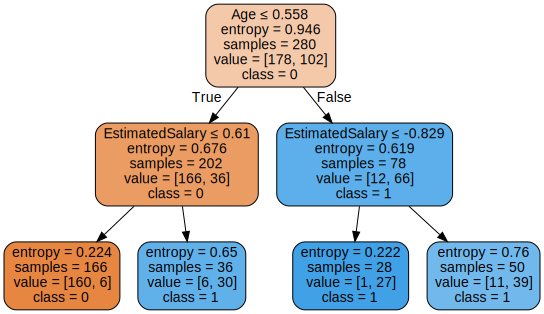

In [84]:
dot_data = export_graphviz(best_tree, out_file=None, feature_names=list(X_train.columns), class_names=class_names,  
                         filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph
#graph.view()

### Ensembles

#### Random Forest

   - Cada uma das árvores é construída por uma amostra com reposição (bootstrap) do conjunto de treino
   - Quando se faz o split/divisão do nó durante a construção da árvore, o split que é escolhido não é mais o melhor dentre todas as features, mas o melhor dentro de um subconjunto de features, melhorando a aleatoriedade e variedade das árvores. Isso proporciona ao modelo encontrar outras ramificações boas caso, e.g, uma feature seja sempre escolhida para fazer o primeiro corte na árvore. Sem o subconjunto de features, essa feature seria escolhida como primeiro corte para todas as árvores e diminuiria a variação dela, sem criar modelos mais distintos para o modelo final melhor

In [102]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'criterion' : 'entropy',
    'min_samples_split': 0.03 ,
    'max_depth': 3,
    'max_features': 'log2'
}

rand_forest = RandomForestClassifier(n_estimators = 10, criterion = 'gini', max_depth = None, min_samples_split = 2, 
                                     min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 'auto', 
                                     max_leaf_nodes = None, min_impurity_decrease = 0.0, min_impurity_split = None, 
                                     bootstrap = True, oob_score = False, n_jobs = 1, random_state = None, verbose = 0, 
                                     warm_start = False, class_weight = None)
rand_forest.set_params(**(params))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.03,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
rand_forest.fit(X_train, np.ravel(y_train))
rand_forest.predict(std_scaler.transform([[1, 30, 40000]]))[0]

0

Holdout

In [106]:
results_holdout(rand_forest, X_train, y_train, X_test, y_test)

,Treino,Teste
f1_score,0.898148,0.870588
precision_score,0.850877,0.840909
recall_score,0.950980,0.902439
accuracy_score,0.921429,0.908333
KS,0.331461,0.368941


CV

In [107]:
results_cv(rand_forest, X_train, y_train, cv_kfold)

,f1_Treino,f1_Teste,precision_Treino,precision_Teste,recall_Treino,recall_Teste,accuracy_Treino,accuracy_Teste,roc_auc_Treino,roc_auc_Teste
0,0.910180,0.875000,0.878049,0.900000,0.935065,0.600000,0.937500,0.839286,0.976102,0.889032
1,0.900000,0.857143,0.857143,0.846154,0.935897,0.875000,0.919643,0.892857,0.973700,0.921875
2,0.908046,0.800000,0.885057,0.750000,0.903614,0.842105,0.937500,0.875000,0.964368,0.889047
3,0.865854,0.864865,0.868132,0.809524,0.882353,1.000000,0.915179,0.910714,0.959247,0.959276
4,0.882682,1.000000,0.827957,0.941176,0.882353,0.941176,0.866071,0.964286,0.948921,0.992459
media,0.893352,0.879402,0.863268,0.849371,0.907857,0.851656,0.915179,0.896429,0.964468,0.930338


#### Bagging

   - Classe de algoritmos que constrói uma série de instâncias de um estimador em conjuntos aleatórios com reposição (bootstrap) do conjunto original e agrega suas predições individuais para formar a predição final. 
   - Reduz overfitting
   - Pode ser treinado em paralelo

In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(base_estimator = KNeighborsClassifier(), n_estimators=10, max_samples=1.0, max_features=1.0, 
                            bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, 
                            random_state=None, verbose=0)
bagging.fit(X_train, np.ravel(y_train))

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [91]:
bagging.predict(std_scaler.transform([[1, 30, 40000]]))[0]

0

Holdout

In [94]:
results_holdout(bagging, X_train, y_train, X_test, y_test)

,Treino,Teste
f1_score,0.884615,0.891566
precision_score,0.867925,0.880952
recall_score,0.901961,0.902439
accuracy_score,0.914286,0.925000
KS,0.331461,0.295770


CV

In [95]:
results_cv(bagging, X_train, y_train, cv_kfold)

,f1_Treino,f1_Teste,precision_Treino,precision_Teste,recall_Treino,recall_Teste,accuracy_Treino,accuracy_Teste,roc_auc_Treino,roc_auc_Teste
0,0.891566,0.851064,0.876543,0.900000,0.896104,0.760000,0.928571,0.857143,0.977339,0.912258
1,0.881988,0.897959,0.855422,0.875000,0.871795,0.875000,0.910714,0.910714,0.975720,0.938802
2,0.904762,0.800000,0.905882,0.727273,0.903614,0.842105,0.919643,0.839286,0.986456,0.884780
3,0.891429,0.894737,0.876404,0.809524,0.905882,1.000000,0.919643,0.928571,0.977148,0.965309
4,0.876404,0.909091,0.865169,0.875000,0.870588,0.882353,0.901786,0.964286,0.970123,0.984917
media,0.889230,0.870570,0.875884,0.837359,0.889597,0.871892,0.916071,0.900000,0.977357,0.937213


#### Boosting

   - Combina diferentes modelos em sequência. Dessa forma, usa os erros obtidos para recriar um modelo melhor
   - Sua execução não permite a construção de modelos em paralelo pois um modelo precisa do anterior, mas cada modelo independente pode ser treinado em paralelo
   - Pode overfittar, dado que os pesos para instâncias que estão sendo preditas errado crescem nos modelos seguintes e outras instâncias continuam com pesos baixos, principalmente se as instâncias preditas errado forem ruídos, pois serão muito enfatizada com relação a outras instâncias. Como usa voto majoritário ponderado, os ruídos que recebem pesos maiores são os que mais pesam no voto.

##### AdaBoost

Faz o fit de uma sequência de modelos fracos (e.g. árvores pequenas, de 1 split), modelos que performam pouco melhor que o aleatório, em versões modificadas do dataset. As predições de todos os modelos são combinadas por um voto majoritário ponderado para produzir o resultado final. 

Cada instância do dataset de treino é ponderado, sendo que o peso inicial é $weight(xi) = \frac{1}{n}$. Os pesos são atualizados de forma que as instâncias preditas incorretamente recebem um peso maior e as instâncias preditas corretamente recebem um peso menor.

   - Melhor em uso para classificação binária

In [117]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 10, learning_rate = 0.1, 
                               algorithm = 'SAMME', random_state = None)

In [118]:
ada_boost.fit(X_train, np.ravel(y_train))
ada_boost.predict(std_scaler.transform([[1, 30, 40000]]))[0]

0

Holdout

In [119]:
results_holdout(ada_boost, X_train, y_train, X_test, y_test)

,Treino,Teste
f1_score,1.000000,0.833333
precision_score,1.000000,0.813953
recall_score,1.000000,0.853659
accuracy_score,1.000000,0.883333
KS,0.331461,0.295770


CV

In [120]:
results_cv(ada_boost, X_train, y_train, cv_kfold)

,f1_Treino,f1_Teste,precision_Treino,precision_Teste,recall_Treino,recall_Teste,accuracy_Treino,accuracy_Teste,roc_auc_Treino,roc_auc_Teste
0,1.0,0.711111,1.0,0.800000,1.0,0.640000,1.0,0.785714,1.0,0.755484
1,1.0,0.723404,1.0,0.750000,1.0,0.708333,1.0,0.785714,1.0,0.781250
2,1.0,0.731707,1.0,0.695652,1.0,0.842105,1.0,0.821429,1.0,0.826458
3,1.0,0.742857,1.0,0.750000,1.0,0.882353,1.0,0.892857,1.0,0.818250
4,1.0,0.882353,1.0,0.882353,1.0,0.882353,1.0,0.910714,1.0,0.856712
media,1.0,0.758287,1.0,0.775601,1.0,0.791029,1.0,0.839286,1.0,0.807631


##### Gradient Boosting

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(n_estimators = 10, learning_rate = 0.1)

In [123]:
grad_boost.fit(X_train, np.ravel(y_train))
grad_boost.predict(std_scaler.transform([[1, 30, 40000]]))[0]

0

Holdout

In [124]:
results_holdout(grad_boost, X_train, y_train, X_test, y_test)

,Treino,Teste
f1_score,0.893023,0.883721
precision_score,0.849558,0.844444
recall_score,0.941176,0.926829
accuracy_score,0.917857,0.916667
KS,0.331461,0.295770


CV

In [125]:
results_cv(grad_boost, X_train, y_train, cv_kfold)

,f1_Treino,f1_Teste,precision_Treino,precision_Teste,recall_Treino,recall_Teste,accuracy_Treino,accuracy_Teste,roc_auc_Treino,roc_auc_Teste
0,0.926829,0.833333,0.873563,0.869565,0.987013,0.800000,0.946429,0.857143,0.987366,0.898710
1,0.901235,0.840000,0.869048,0.807692,0.935897,0.875000,0.928571,0.857143,0.981647,0.914714
2,0.923977,0.837209,0.897727,0.750000,0.951807,0.947368,0.941964,0.875000,0.986542,0.917496
3,0.897727,0.864865,0.868132,0.800000,0.929412,0.941176,0.919643,0.910714,0.978840,0.956259
4,0.871508,0.969697,0.829787,1.000000,0.917647,0.941176,0.897321,0.982143,0.973551,0.999246
media,0.904255,0.869021,0.867651,0.845452,0.944355,0.900944,0.926786,0.896429,0.981589,0.937285


#### SVM

   - Efetivo em espaços de alta dimensão, mesmo quando o número de features é maior que o de instâncias
   - Se o número de features for maior que o número de instâncias, pode-se evitar overfitting alterando o Kernel e mudando a regularização (C)

In [132]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=True, tol=0.001, 
          cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)

In [133]:
svc.fit(X_train, np.ravel(y_train))
svc.predict(std_scaler.transform([[1, 30, 40000]]))[0]

0

Holdout

In [134]:
results_holdout(svc, X_train, y_train, X_test, y_test)

,Treino,Teste
f1_score,0.736264,0.777778
precision_score,0.837500,0.903226
recall_score,0.656863,0.682927
accuracy_score,0.828571,0.866667
KS,0.331461,0.295770


CV

In [135]:
results_cv(svc, X_train, y_train, cv_kfold)

,f1_Treino,f1_Teste,precision_Treino,precision_Teste,recall_Treino,recall_Teste,accuracy_Treino,accuracy_Teste,roc_auc_Treino,roc_auc_Teste
0,0.715328,0.682927,0.816667,0.875000,0.636364,0.560000,0.825893,0.767857,0.918544,0.914839
1,0.748201,0.634146,0.852459,0.764706,0.666667,0.541667,0.843750,0.732143,0.924921,0.858073
2,0.784314,0.611111,0.857143,0.647059,0.722892,0.578947,0.852679,0.750000,0.930531,0.860597
3,0.723684,0.882353,0.820896,0.882353,0.647059,0.882353,0.812500,0.928571,0.911892,0.942685
4,0.735484,0.758621,0.814286,0.916667,0.670588,0.647059,0.816964,0.875000,0.899281,0.969834
media,0.741402,0.713832,0.832290,0.817157,0.668714,0.642005,0.830357,0.810714,0.917034,0.909206


#### Regressão Logística

### Modelagem -- Regressão

#### Regressão linear simples

#### Lasso(l1) e Ridge(l2)

#### Regressão linear múltipla

#### KNN regressor

#### Árvore de Regressão

### Modelagem -- Clustering/Agrupamento

#### Hierárquico/Agglomerative

#### K-means

#### DBScan